## Boston AirBnB open data with the CRISP-DM (Cross Industry Process for Data Mining)

To get general AirBnB business insight, the Boston data from AirBnB will be analyzed based on the CRISP-DM. The subprocesses of the CRISP-DM are written below.

`1`. Business Understanding

`2`. Data Understanding

`3`. Prepare Data

`4`. Data Modeling

`5`. Evaluate the Results

`6`. Deploy

In [127]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar #To check holidays in the U.S
import time
import copy
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from functions_for_AirBnB import * # a file having necessary functions for preparing data

In [128]:
# Load the AirBnB files
df_listing, df_calendar, df_reviews = load_bnb_files()

## 1. Business Understanding

Business Questions 
- How is the price of Airbnb adjusted in terms of seasons and locations?
- What are the most relevant features of the groups over the 80 percentile and under the 20 percentile?
- What are the distinctive features in the 80 percetile group for 2 people travellers and more than 4 people travellers?
    

## 2. Data Understanding

Check and play around the dataframes loaded before to get some idea or to get the business quesations progressed.
### 2.1. For df_listing

In [129]:
# Setting option for seeing the whole columns of dataframes
pd.set_option('display.max_columns', None)  

In [130]:
print(df_listing.shape)
df_listing.head(n=5)

(3585, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [144]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

Index(['notes', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

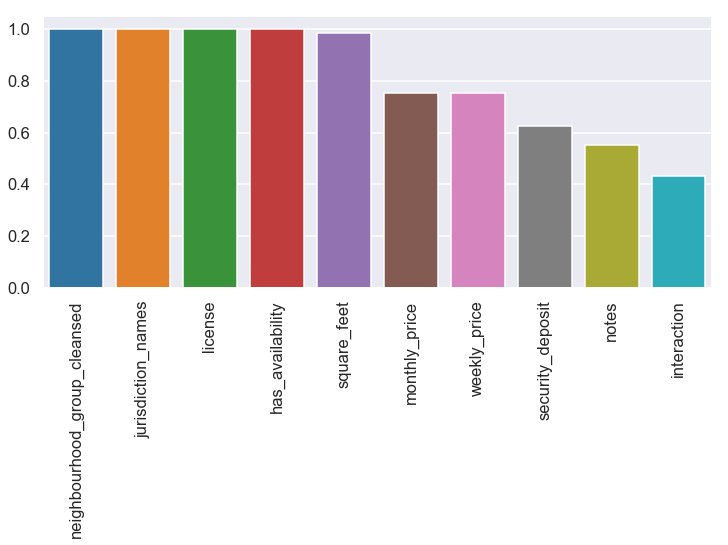

In [145]:
# Check columns that having missing values over 50%
df_missing = df_listing.isna().mean()
print(df_missing[df_missing>0.5].index)
df_missing.sort_values(ascending=False)[0:10]
testframe = pd.DataFrame(df_missing.sort_values(ascending=False)[0:10]).T
testframe.head()


sns.set_style("darkgrid")
sns.set_context("talk")
figure, axes = plt.subplots(figsize=(12,5))
ax0 = sns.barplot(data=testframe)
plt.xticks(rotation=90)

In [146]:
print("# of id:",df_listing.id.unique().size)
print("# of host_id:",df_listing.host_id.unique().size)
# There are some hosts who take care of more than two ids

# of id: 3585
# of host_id: 2181


# of accommodates: [ 4  2  3  5  1  8  6 16  7  9 10 12 11 14]
Int64Index([2, 4, 1, 3, 5, 6, 8, 7, 10, 9, 12, 11, 14, 16], dtype='int64')

Accomodates equal or less than 2 is 53.61 %
Accomodates more than 2 is 42.57 %


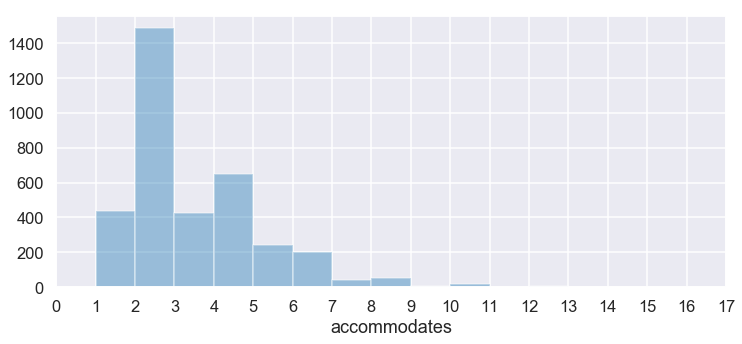

In [147]:
# Check the number of accomodates in the dataframe
print("# of accommodates:",df_listing.accommodates.unique())
tmp = df_listing.accommodates.value_counts(ascending=False)/df_listing.accommodates.size
print(tmp.index)
print()
print("Accomodates equal or less than 2 is {:5.2f} %".format((tmp[1]+tmp[2])*100))
print("Accomodates more than 2 is {:5.2f} %".format((tmp[3]+tmp[4]+tmp[5]+tmp[6])*100))

sns.set_style("darkgrid")
sns.set_context("talk")
figure, axes = plt.subplots(figsize=(12,5))
ax0 = sns.distplot(df_listing.accommodates, kde=False,  bins=15)
axes.set_xticks(np.arange(0, 18))


In [148]:
print("# of bed_type:",df_listing.bed_type.unique())

# of bed_type: ['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']


### 2.2. For df_calendar

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

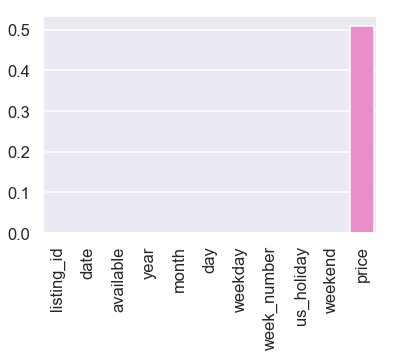

In [149]:
df_missing_calendar = df_calendar.isna().mean()
testframe = pd.DataFrame(df_missing_calendar.sort_values(ascending=True)).T

sns.set_style("darkgrid")
sns.set_context("talk")
figure, axes = plt.subplots()
ax0 = sns.barplot(data=testframe)
plt.xticks(rotation=90)


## 3. Prepare data

## Strategies
- Drop columns having missing values over 50% 
- Drop columns related with urls and other irrelevant columns
- Drop columns having only one value or a duplicated column
- Check which columns are numerical or categorical
- Change a categorical colums having massive different values into a two boolean columns to save information
- Use one hot encoding to categorical features having suitable values 
- Impute columns having missing values over 30% to replace missing values with the mean values of corresponding columns
 

## Modifying df_calendar

In [150]:
# Get columns of year, month, day, weekday, us_holiday 
df_cal_modified = modify_calendar(df_calendar)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [ ]:
print(df_cal_modified.shape[0]/365)
# Each listing_id has 365 rows

## Answer 1

In [ ]:
# Average price per month
sns.set_style("darkgrid")
sns.set_context("talk")
sns.catplot(x='month', y='price', data=df_cal_modified, kind="point", height=6, aspect=2.1)


In [ ]:
# Avereage price per weeknumber
sns.set_style("darkgrid")
sns.set_context("talk")
sns.catplot(x='week_number', y='price', data=df_cal_modified, kind="point", height=6, aspect=2.1, rc={'font.size':10})
plt.xticks(rotation=90)


In [ ]:
# Average price per location
df_listing.price.head()
df_listing.price = df_listing.price.str.replace('$','')
df_listing.price = df_listing.price.str.replace(',','')
df_listing.price = df_listing.price.astype(float)
sort = df_listing.groupby(["neighbourhood_cleansed"])['price'].mean().sort_values(ascending=False)

sns.set_style("darkgrid")
sns.set_context("talk")
figure, axes = plt.subplots(figsize=(12,5))
sns.barplot(x='neighbourhood_cleansed', y='price', data=df_listing, order=sort.index)
plt.xticks(rotation=90)


In [ ]:
print(df_listing.shape)

## Cleaning df_listing : 
    - removing irrelevant columns 
    - changing object type columns to numeric columns or manipulating them using one hot encoding (categorical values)
    - filling NaN values (missing values : imputing or dropping)
    - creating an integrated_score_log column by the natural log of the result from 'review_scores_rating' times 'number_of_reviews' +1 


In [ ]:
df_listing, df_calendar, df_reviews = load_bnb_files()
df_cal_modified = modify_calendar(df_calendar)
# Put the df_listing dataframe together with the columns coming from modify_calendar(df_calendar)
# The new added columns are  new 'unavail_days', 'avail_days_weekends', 'avail_days_weekdays', 
# 'price_weekend', and 'price_weekday' 
df_listing = add_availabledays_price(df_listing, df_cal_modified)
df_listing_modi2 = clean_listing_df(df_listing)  

df_listing_modi2.shape

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


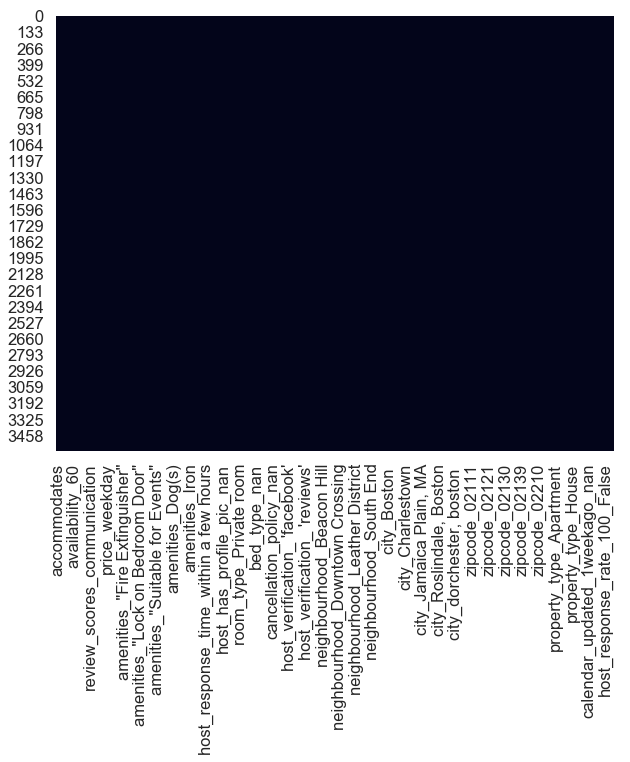

In [151]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_listing_modi2.isnull(), cbar=False)
check_null=list(df_listing_modi2.isnull().sum())
print(check_null)


In [152]:
df_listing_modi2.head()
df_listing_modi2.columns.tolist()

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'guests_included',
 'minimum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'unavail_days',
 'avail_days_weekends',
 'avail_days_weekdays',
 'price_weekend',
 'price_weekday',
 'amenities_"24-Hour Check-in"',
 'amenities_"Air Conditioning"',
 'amenities_"Buzzer/Wireless Intercom"',
 'amenities_"Cable TV"',
 'amenities_"Carbon Monoxide Detector"',
 'amenities_"Elevator in Building"',
 'amenities_"Family/Kid Friendly"',
 'amenities_"Fire Extinguisher"',
 'amenities_"First Aid Kit"',
 'amenities_"Free Parking on Premises"',
 'amenities_"Free Parking on Street"',
 'amenities_"Hair Dryer"',
 'amenities_"Hot Tub"',
 'amenities_"Indoor 

In [153]:
print(df_listing_modi2.integrated_score_log.describe())
print(df_listing_modi2.integrated_score_log.quantile(0.8))
print(df_listing_modi2.integrated_score_log.quantile(0.21))
print(df_listing_modi2.integrated_score_log.quantile(0.2109))

count    3585.000000
mean        5.325527
std         3.041916
min         0.000000
25%         4.531703
50%         6.175867
75%         7.566828
max        10.358155
Name: integrated_score_log, dtype: float64
7.836368513676909
0.0
2.63533862209331


# of accommodates: [ 4  2  3  5  1  8  6 16  7  9 10 12 11 14]
Int64Index([2, 4, 1, 3, 5, 6, 8, 7, 10, 9, 12, 11, 14, 16], dtype='int64')

Accomodates equal or less than 2 is 53.61 %
Accomodates more than 2 is 42.57 %


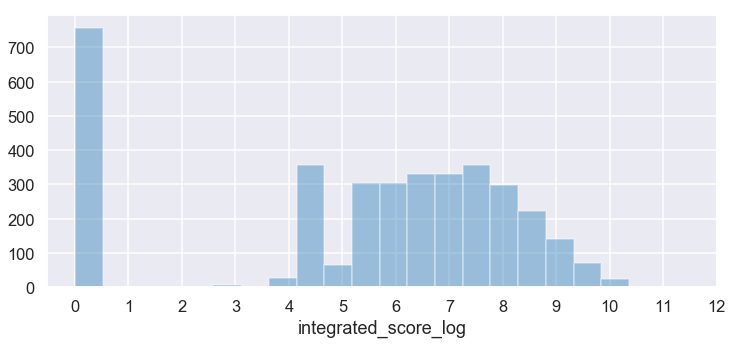

In [154]:
# Check the number of accomodates in the dataframe
print("# of accommodates:",df_listing.accommodates.unique())
tmp = df_listing.accommodates.value_counts(ascending=False)/df_listing.accommodates.size
print(tmp.index)
print()
print("Accomodates equal or less than 2 is {:5.2f} %".format((tmp[1]+tmp[2])*100))
print("Accomodates more than 2 is {:5.2f} %".format((tmp[3]+tmp[4]+tmp[5]+tmp[6])*100))

sns.set_style("darkgrid")
sns.set_context("talk")
figure, axes = plt.subplots(figsize=(12,5))
ax0 = sns.distplot(df_listing_modi2.integrated_score_log, kde=False,bins=20) 
axes.set_xticks(np.arange(0, 13,1))


In [155]:
# Conditioning df_listing_modi2 frame to categorize the dataset into poor, normal, high earner groups
df_listing_modi3 = conditioning_listing_df(df_listing_modi2)

In [156]:
df_listing_modi3.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,city_ALLSTON,city_Allston,city_Boston,city_Boston,city_Boston (Charlestown),city_Boston (Jamaica Plain),"city_Boston, Massachusetts, US",city_Brighton,city_Brighton,city_Brookline,city_Cambridge,city_Charlestown,city_Dorchester,city_East Boston

## Data modeling

In [157]:
# Store the 'y_label' feature in a new variable and remove it from the dataset
target = df_listing_modi3['y_label']
df_listing_modi3 = df_listing_modi3.drop('y_label', axis = 1)

In [158]:
df_listing_modi3.head(n=3)

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,city_ALLSTON,city_Allston,city_Boston,city_Boston,city_Boston (Charlestown),city_Boston (Jamaica Plain),"city_Boston, Massachusetts, US",city_Brighton,city_Brighton,city_Brookline,city_Cambridge,city_Charlestown,city_Dorchester,city_East Boston

In [159]:
X_train, X_test, y_train, y_test = train_test_split(df_listing_modi3, target, test_size=0.3, random_state=42)

In [160]:
print(X_train.shape)
print(X_test.shape)

(2509, 254)
(1076, 254)


In [161]:
model_list = [RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier]
train_list = []
test_list = []

for i in model_list:
    model = i(n_estimators=200)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_list.append(train_accuracy)
    test_list.append(test_accuracy)
    print(i,"Accuracy for training data:",train_accuracy)
    print(i,"Accuracy for testing data:", test_accuracy)

<class 'sklearn.ensemble.forest.RandomForestClassifier'> Accuracy for training data: 0.9996014348345954
<class 'sklearn.ensemble.forest.RandomForestClassifier'> Accuracy for testing data: 0.7360594795539034
<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> Accuracy for training data: 0.6632124352331606
<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> Accuracy for testing data: 0.6496282527881041
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> Accuracy for training data: 0.8632921482662416
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> Accuracy for testing data: 0.7323420074349443


In [162]:
# # Use GridSearch to find better hyperparameters for RandomForestClassifier
# start = time.time()
# classifier = RandomForestClassifier()
# param_for_rfc = {'n_estimators':[50,100,150,200,300], 'max_features':[30,40,50], "max_depth":[10,15,20]}
# # scoring = {'accuracy': make_scorer(accuracy_score)}
# grid_classifier = GridSearchCV(classifier, param_for_rfc, cv=10, return_train_score=True, n_jobs=-1)
# grid_classifier.fit(X_train, y_train)
# result = grid_classifier.cv_results_
# print("time to excute:", time.time() - start)
# grid_classifier.best_estimator_

In [163]:
# Define the classifier, and fit it to the data
model = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, max_features=50,
                               max_depth=15, bootstrap=True)
model.fit(X_train, y_train)
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_list.append(train_accuracy)
test_list.append(test_accuracy)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.9445994420087684
The test accuracy is 0.7323420074349443


## Evaluate and Results of Feature Importances

In [164]:
importances = model.feature_importances_ 
print(len(importances))
print()
# print(importances)

indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:16]]
values = importances[indices][:16]

tmp = 0
print("Feature     /    Importance value:")
for i,j in zip(columns, values):
    print(i,"/",j)
    tmp += j
    
print()    
print("The sum of 16 values of importance:", tmp)

254

Feature     /    Importance value:
host_verification_ 'reviews' / 0.10692787142101365
unavail_days / 0.047710288598223204
price_weekday / 0.04691158816206984
price_weekend / 0.04560805166847308
avail_days_weekdays / 0.04460320107524616
avail_days_weekends / 0.040562369067141696
cleaning_fee / 0.03545821060734523
minimum_nights / 0.024139789324047388
host_is_superhost_f / 0.0191916508032387
host_is_superhost_t / 0.01846223716495056
accommodates / 0.017903644612436174
host_response_time_within an hour / 0.014530513296156806
house_rules_exist_tf_True / 0.013824171094852018
host_response_time_nan / 0.01376565837835526
house_rules_exist_tf_False / 0.012241347735239858
instant_bookable_f / 0.010748614030010034

The sum of 16 values of importance: 0.5125892070387995


The sum of top 15 values of importance takes up to the half of the total importance. So, it is worth to check the 'high' and 'low' performance groups using these features.
 these features can be summarized into 10 fields. 
 
- 'host_verification' :  'reviews' 
- 'price' : both weekday and weekend
- 'available day'  :  both weekday and weekend
- 'cleaning_fee' 
- 'minimum_nights'
- 'host_is_superhost' : superhost or not
- 'accommodates'
- 'host_response_time' : within an hour and none
- 'house_rules_exist' : exist or not exist
- "instant_bookable" : True or not

This results are going to be evaluated together with the result of PCA.

## PCA

In [169]:
# Apply feature scaling to the general population demographics data.
scaler = StandardScaler()
column_list = list(df_listing_modi3.columns)
scaled_values = scaler.fit_transform(df_listing_modi3.values)
df_listing_scaled = pd.DataFrame(scaled_values, index=df_listing_modi3.index, columns=df_listing_modi3.columns)
df_listing_scaled.shape

(3585, 254)

In [170]:
# Apply PCA to the data.
pca = PCA(n_components=200)
pca.fit(df_listing_scaled)

# Investigate the variance accounted for by each principal component.
tmp1 = 0
tmp2 = 0
for i in pca.explained_variance_ratio_:
    tmp1 += 1
    tmp2 += i
    print(tmp1, tmp2)
    if tmp2 > 0.9:
        break

1 0.03538285360743003
2 0.06663428246647687
3 0.08615212672372491
4 0.10304210163740704
5 0.11948203048863777
6 0.13413239420761786
7 0.14767302739658544
8 0.16105892748657213
9 0.17366723805605033
10 0.18552347532189298
11 0.19725594361952264
12 0.20884098115350805
13 0.2200215745651853
14 0.23092717537577262
15 0.24175600239845857
16 0.25218499865797195
17 0.26224524228712476
18 0.2721136478309055
19 0.2819699575333547
20 0.291561866301434
21 0.3009859189907712
22 0.3103226318318154
23 0.3195055884890463
24 0.32866023707191333
25 0.33770823238559433
26 0.3465677368392469
27 0.35521699918866595
28 0.3637853885063854
29 0.3721616707086945
30 0.38046528291920956
31 0.388727461682335
32 0.3968542701400468
33 0.4049460771236416
34 0.4127691823276297
35 0.42046301367960925
36 0.4280085766330692
37 0.43553006225273744
38 0.4429350190595251
39 0.45024886633204847
40 0.45741349976973367
41 0.4644631222407476
42 0.4712775908211664
43 0.47807369431582947
44 0.48471950173943645
45 0.491245756998

In [171]:
# Apply PCA to the data.
pca = PCA(n_components=142, random_state=42)
pca.fit(df_listing_scaled)

PCA(copy=True, iterated_power='auto', n_components=142, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [172]:
# Transform scaled dataframe
df_listing_scaled_transformed = pca.fit_transform(df_listing_scaled)
df_listing_scaled_transformed = pd.DataFrame(df_listing_scaled_transformed)
# Create new dataframe using 'df_listing_scaled_transformed' and 'target'
new_df = pd.concat([df_listing_scaled_transformed, target], axis=1)
new_df_total = new_df[new_df.y_label != 'normal']
new_df_total.y_label.unique()
new_df_total.head()
new_df_total = new_df_total.add_prefix('pca_')
new_df_total = new_df_total.rename(columns={"pca_y_label": "performance group"})
new_df_total.head(n=3)

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,pca_40,pca_41,pca_42,pca_43,pca_44,pca_45,pca_46,pca_47,pca_48,pca_49,pca_50,pca_51,pca_52,pca_53,pca_54,pca_55,pca_56,pca_57,pca_58,pca_59,pca_60,pca_61,pca_62,pca_63,pca_64,pca_65,pca_66,pca_67,pca_68,pca_69,pca_70,pca_71,pca_72,pca_73,pca_74,pca_75,pca_76,pca_77,pca_78,pca_79,pca_80,pca_81,pca_82,pca_83,pca_84,pca_85,pca_86,pca_87,pca_88,pca_89,pca_90,pca_91,pca_92,pca_93,pca_94,pca_95,pca_96,pca_97,pca_98,pca_99,pca_100,pca_101,pca_102,pca_103,pca_104,pca_105,pca_106,pca_107,pca_108,pca_109,pca_110,pca_111,pca_112,pca_113,pca_114,pca_115,pca_116,pca_117,pca_118,pca_119,pca_120,pca_121,pca_122,pca_123,pca_124,pca_125,pca_126,pca_127,pca_128,pca_129,pca_130,pca_131,pca_132,pca_133,pca_134,pca_135,pca_136,pca_137,pca_138,pca_139,pca_140,pca_141,performance group
0,-1.332802,-0.923894,-0.088580,-2.822502,4.940919,2.388069,1.340657,0.528226,-0.801351,0.131687,-0.190819,-0.186262,-0.460469,0.140799,-0.235456,-0.236942,3.218601,3.101298,0.503059,-2.089410,2.368750,0.095377,-2.718736,-0.772819,-3.697302,1.216734,0.591613,4.126742,-0.087335,-2.986226,-4.065500,0.444044,-0.959194,1.580214,-1.078248,-0.854905,-0.527120,-0.338453,0.473872,-0.184735,1.003865,0.040537,0.464061,-0.001331,-0.237560,0.166367,0.017744,-0.591244,0.862729,-0.979512,0.059056,1.018056,-0.748430,-0.019431,1.093600,-0.764569,-0.238654,0.248037,-0.794904,0.004219,-0.802852,1.167872,-0.124902,0.148894,-0.122292,-0.662210,-0.251103,1.051336,-0.222030,-0.014009,0.363539,-0.293257,-0.366244,0.988582,-0.470385,0.282988,-1.007859,0.267727,-0.474475,0.282741,-0.141750,0.038028,-0.287134,0.306890,1.244045,-0.993518,0.132913,-0.365823,0.018363,0.413480,-0.484527,0.198397,-0.081765,-0.204131,-0.701059,-0.284236,-0.190264,-0.246164,-0.802278,-0.640352,-0.086449,-0.349265,1.496109,1.046111,-0.486414,0.286251,1.145576,1.000035,-0.261205,-0.079303,-0.148005,0.653631,-0.593246,0.086242,1.239862,0.064857,0.452142,-2.000983,0.738027,-0.008364,0.189047,0.490642,-0.218413,1.128758,0.332837,-1.274812,1.156792,0.211116,0.809705,0.081020,-2.179811,-2.733477,0.925225,-1.748811,0.011368,1.230459,0.249053,-0.449444,1.635986,-0.890783,0.241384,-0.452968,poor
1,-1.674096,4.565225,0.957300,-0.536084,-1.664085,0.670241,0.129245,0.227173,-0.116965,2.668298,-1.238372,-0.341575,0.089922,-0.097835,1.221538,-1.279003,3.620258,2.502534,2.970155,-3.121914,0.360809,-0.399463,-3.882419,-1.094057,-4.915324,-0.576108,1.233339,3.644379,-0.616954,-3.929810,-0.708399,1.926509,-1.021252,2.094782,-1.718871,-1.082126,-1.013615,1.757770,-0.586492,1.440123,-0.074205,-0.895684,-0.373286,-1.147843,2.102292,-0.278202,-0.028466,-0.117254,1.677643,-2.214126,1.775995,2.341246,-0.824887,1.336206,0.024018,-1.795054,-1.930997,-0.823352,0.302051,-1.113109,-1.899897,0.365428,0.037246,0.637618,-0.016720,-1.154668,0.898025,0.710199,-0.109439,0.286645,-1.798712,-0.114259,-0.022162,1.698152,0.094241,-0.469874,0.552049,0.511977,-0.389467,-0.237294,0.395838,-1.708781,-0.196472,-0.388702,2.304291,0.026591,0.548224,-0.381141,-0.359710,0.517662,-0.516137,0.475989,-0.221866,-0.587600,-0.827032,0.006426,0.154047,-0.571224,-0.868242,-0.331030,-0.590311,-0.489854,1.737813,1.256559,0.241846,-0.232743,0.538692,0.979934,1.108391,-0.262167,-1.049283,1.000773,-0.376893,0.317913,0.133103,0.777809,0.997463,-0.440505,1.306665,0.004703,0.068120,2.584008,0.051296,2.167514,-0.285059,-2.840698,0.984461,-0.717260,-0.593177,0.198299,-1.771837,-0.733160,-0.614349,-1.208094,0.516295,-0.587529,-0.206032,-0.169295,2.349315,-2.127397,0.195224,-0.969454,high
2,-2.036366,3.504907,6.111917,-3.305770,-0.244532,0.249485,-2.224534,-2.495255,2.072361,0.095369,0.318941,-0.647656,-0.013153,-0.840983,0.485916,0.083711,3.412748,-0.713972,0.047915,-5.868092,3.253918,0.363965,-0.339369,-2.140791,-4.4

In [173]:
# # Compare mean values of pca components from the two dataframes
# # Collect mean value of each pca component
# poor_array = new_df_poor.describe().iloc[1:2].to_numpy().flatten()
# high_array = new_df_high.describe().iloc[1:2].to_numpy().flatten()
# df_compare = pd.DataFrame()
# df_compare['poor'] = poor_array
# df_compare['high'] = high_array
# df_compare['difference'] = df_compare['poor'] - df_compare['high']
# df_compare['difference'] = df_compare['difference'].abs()
# df_pca = df_compare.sort_values(by=['difference'], ascending=False).head(n=10)
# df_pca

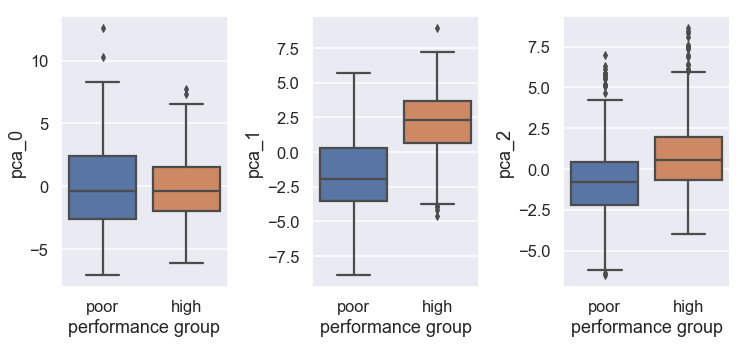

In [260]:
sns.set(font_scale=1.1)
sns.set_context("talk")
figure, axes = plt.subplots(1,3, figsize=(12,5))
figure.subplots_adjust(wspace=0.5)
ax0 = sns.boxplot(x='performance group', y='pca_0', data=new_df_total, ax=axes[0])
ax1 = sns.boxplot(x='performance group', y='pca_1', data=new_df_total, ax=axes[1])
ax3 = sns.boxplot(x='performance group', y='pca_2', data=new_df_total, ax=axes[2])

After comparing mean values of components of pca, it is found that pca1 and pca2 components are worth to be checked. 

In [175]:
# Load original df_listing_modi3 dataframe and attach label to analyze pca components
df_listing_modi3_with_label = pd.concat([df_listing_modi3, target], axis=1)
df_listing_modi3_with_label.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,city_ALLSTON,city_Allston,city_Boston,city_Boston,city_Boston (Charlestown),city_Boston (Jamaica Plain),"city_Boston, Massachusetts, US",city_Brighton,city_Brighton,city_Brookline,city_Cambridge,city_Charlestown,city_Dorchester,city_East Boston

In [234]:
df_listing_poor = df_listing_modi3_with_label[df_listing_modi3_with_label.y_label == 'poor']
df_listing_high = df_listing_modi3_with_label[df_listing_modi3_with_label.y_label == 'high']
df_listing_total = pd.concat([df_listing_poor, df_listing_high])


In [177]:
#for pca1
pos_list_1, neg_list_1 = investigate(df_listing_scaled, pca, 1)
result_pca1_df = check_difference(pos_list_1, neg_list_1, df_listing_poor, df_listing_high)
result_pca1_df[0:10]

positive to pca1: [('host_response_rate_100_True', '0.207'), ('host_response_time_within an hour', '0.196'), ('extra_people_fee_tf_True', '0.180'), ('amenities_"Carbon Monoxide Detector"', '0.170'), ('amenities_"Hair Dryer"', '0.161'), ('amenities_Hangers', '0.158'), ('calendar_updated_1weekago_yes', '0.158'), ('amenities_"Smoke Detector"', '0.155'), ('amenities_Shampoo', '0.154'), ('amenities_Iron', '0.152')]

negative to pca1: [('host_response_rate_100_False', '-0.207'), ('extra_people_fee_tf_False', '-0.180'), ('calendar_updated_1weekago_more_than_1week', '-0.158'), ('host_response_time_nan', '-0.154'), ('house_rules_exist_tf_False', '-0.149'), ('host_is_superhost_f', '-0.140'), ('host_acceptance_rate_100_False', '-0.134'), ('property_type_Apartment', '-0.118'), ('amenities_"Elevator in Building"', '-0.115'), ('cancellation_policy_flexible', '-0.109')]



,high,poor,difference
host_response_rate_100_False,0.186890,0.619048,0.432158
host_response_rate_100_True,0.813110,0.380952,0.432158
house_rules_exist_tf_False,0.132497,0.554233,0.421736
host_response_time_within an hour,0.629010,0.257937,0.371073
extra_people_fee_tf_False,0.437936,0.787037,0.349101
extra_people_fee_tf_True,0.562064,0.212963,0.349101
host_response_time_nan,0.008368,0.310847,0.302478
cancellation_policy_flexible,0.145049,0.433862,0.288814
host_is_superhost_f,0.700139,0.982804,0.282665
"amenities_""Elevator in Building""",0.119944,0.357143,0.237199


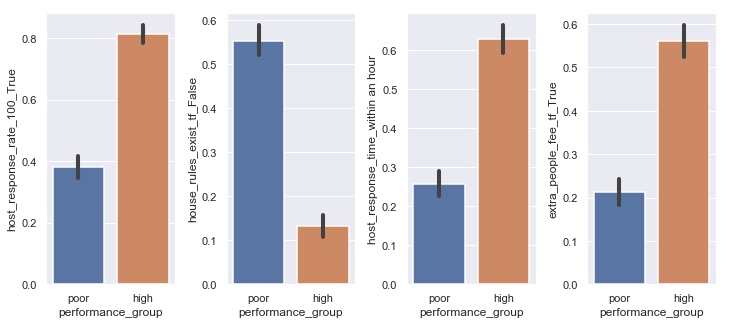

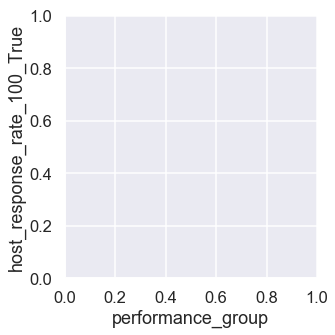

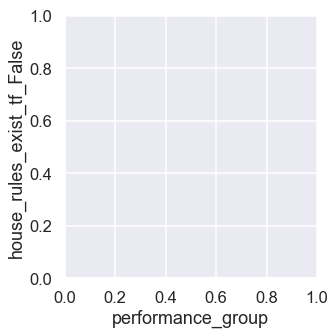

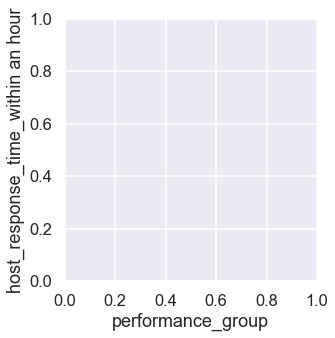

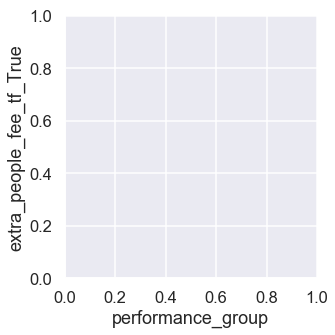

In [265]:
# Check columns that having missing values over 50%
testframe =result_pca1_df[0:10].T
testframe['performance group'] = testframe.index
testframe = testframe.drop(['difference'])
testframe.head()

df_listing_total = pd.concat([df_listing_poor, df_listing_high])
df_listing_total["performance_group"] = df_listing_total['y_label']
df_listing_total.drop(['y_label'], axis=1, inplace=True)

sns.set()
figure, axes = plt.subplots(1,4, figsize=(12,5))
sns.set_context("talk")
figure.subplots_adjust(wspace=0.4)
ax0 = sns.catplot(x='performance_group', y='host_response_rate_100_True',data=df_listing_total, ax=axes[0], kind='bar')
ax1 = sns.catplot(x='performance_group', y='house_rules_exist_tf_False',data=df_listing_total, ax=axes[1], kind='bar')
ax2 = sns.catplot(x='performance_group', y='host_response_time_within an hour',data=df_listing_total, ax=axes[2], kind='bar')
ax3 = sns.catplot(x='performance_group', y='extra_people_fee_tf_True', data=df_listing_total, ax=axes[3], kind='bar')


We need to concentrate on 6 original features from df_listing dataframe, which are highly related with the pca1 component. 

- 'host_response_rate' : 100% or not
- 'house_rules' : exist or not
- 'host_response_time' : within an hour or not
- 'extra_people_fee' : exist or not
- 'cancellation_policy' : flexible or not
- 'host_is_superhost' : superhost or not

In [178]:
# For pca2
pos_list_2, neg_list_2 =  investigate(df_listing_scaled, pca, 2)
result_pca2_df = check_difference(pos_list_2, neg_list_2, df_listing_poor, df_listing_high)
result_pca2_df[0:10]

positive to pca2: [('avail_days_weekends', '0.275'), ('avail_days_weekdays', '0.272'), ('require_guest_phone_verification_t', '0.226'), ('cancellation_policy_super_strict_30', '0.174'), ('host_identity_verified_t', '0.160'), ('require_guest_profile_picture_t', '0.154'), ('host_response_time_within a few hours', '0.139'), ("host_verification_ 'reviews'", '0.130'), ('house_rules_exist_tf_True', '0.129'), ("host_verification_ 'phone'", '0.125')]

negative to pca2: [('unavail_days', '-0.273'), ('require_guest_phone_verification_f', '-0.226'), ('amenities_Hangers', '-0.176'), ('amenities_"Laptop Friendly Workspace"', '-0.172'), ('amenities_"Hair Dryer"', '-0.167'), ('amenities_Iron', '-0.165'), ('host_identity_verified_f', '-0.160'), ('require_guest_profile_picture_f', '-0.154'), ('amenities_Essentials', '-0.148'), ('host_response_time_nan', '-0.133')]



,high,poor,difference
unavail_days,131.564854,212.201058,80.636205
avail_days_weekdays,168.202232,109.603175,58.599057
avail_days_weekends,65.232915,43.678571,21.554343
house_rules_exist_tf_True,0.867503,0.445767,0.421736
host_verification_ 'reviews',1.000000,0.682540,0.317460
host_response_time_nan,0.008368,0.310847,0.302478
host_identity_verified_f,0.135286,0.416667,0.281381
host_identity_verified_t,0.864714,0.583333,0.281381
"amenities_""Hair Dryer""",0.564854,0.496032,0.068822
require_guest_profile_picture_f,0.938633,0.997354,0.058721


There could be 5 original features from df_listing dataframe, which are highly related with the pca2 component. 

- 'total available / unavailable days'
- 'house_rules' : exist or not
- 'host_verification' : 'reviews'
- 'host_response_time' : nan
- 'host_identity': verified or not

In [179]:
# Chekc also pca0 to find other relavant original features 
pos_list_0, neg_list_0 = investigate(df_listing_scaled, pca, 0)
result_pca0_df = check_difference(pos_list_0, neg_list_0, df_listing_poor, df_listing_high)
result_pca0_df[0:10]

positive to pca0: [('room_type_Entire home/apt', '0.240'), ('price_weekday', '0.231'), ('price_weekend', '0.230'), ('accommodates', '0.205'), ('amenities_"Cable TV"', '0.175'), ('cleaning_fee', '0.174'), ('amenities_Gym', '0.172'), ('amenities_"Elevator in Building"', '0.170'), ('amenities_TV', '0.166'), ('beds', '0.154')]

negative to pca0: [('room_type_Private room', '-0.228'), ('cancellation_policy_flexible', '-0.126'), ('require_guest_phone_verification_f', '-0.106'), ('host_identity_verified_f', '-0.096'), ('property_type_House', '-0.096'), ('amenities_"Lock on Bedroom Door"', '-0.089'), ('host_acceptance_rate_100_True', '-0.089'), ('calendar_updated_1weekago_more_than_1week', '-0.085'), ('amenities_"translation missing: en.hosting_amenity_49"', '-0.080'), ('is_location_exact_f', '-0.074')]



,high,poor,difference
price_weekday,166.367698,225.248385,58.880687
price_weekend,172.345639,227.852484,55.506845
cleaning_fee,57.475633,75.510399,18.034766
cancellation_policy_flexible,0.145049,0.433862,0.288814
host_identity_verified_f,0.135286,0.416667,0.281381
"amenities_""Elevator in Building""",0.119944,0.357143,0.237199
calendar_updated_1weekago_more_than_1week,0.301255,0.537037,0.235782
amenities_Gym,0.034868,0.255291,0.220424
host_acceptance_rate_100_True,0.482566,0.267196,0.215370
property_type_House,0.242678,0.107143,0.135535


There are 8 original features that are highly realted with the pca0 component.

- 'price' : weekday and weekend
- 'cleaning_fee'
- 'cancellation_policy' : flexible or not
- 'host_identity': verified or not
- 'amenities' : "Elevator in Building" or not
- 'calendar_updated' : more_than_1week or not
- 'amenities' : "Gym" or not
- 'host_acceptance_rate' : 100% or not

## Insight from answer 2

## Accomodates for 2 people vs more than 2 people

In [105]:
df_listing_poor = df_listing_modi3_with_label[df_listing_modi3_with_label.y_label == 'poor']
df_listing_high = df_listing_modi3_with_label[df_listing_modi3_with_label.y_label == 'high']

In [106]:
# restore_df_listing_poor = restore_df_listing[restore_df_listing.y_label == 'poor']
restore_df_listing_high = df_listing_modi3_with_label[df_listing_modi3_with_label.y_label == 'high']
restore_df_listing_high.head(n=5)

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,city_ALLSTON,city_Allston,city_Boston,city_Boston,city_Boston (Charlestown),city_Boston (Jamaica Plain),"city_Boston, Massachusetts, US",city_Brighton,city_Brighton,city_Brookline,city_Cambridge,city_Charlestown,city_Dorchester,city_East Boston

In [107]:
df_listing_high_more_2 = df_listing_high[df_listing_high.accommodates >2]
df_listing_high_equalorless_2 = df_listing_high[df_listing_high.accommodates <= 2]

In [108]:
# restore_df_listing_high_over2.describe().head(n=2)
mean_more_2 = df_listing_high_more_2.describe().iloc[1]

In [109]:
mean_equalorless_2 = df_listing_high_equalorless_2.describe().iloc[1]

In [110]:
df_more_2 = pd.DataFrame(data=mean_more_2.values, index=mean_more_2.index, columns=['more_2'])
df_equalorless_2 = pd.DataFrame(data=mean_equalorless_2.values, index=mean_equalorless_2.index, columns=['equalorless_2'])
df_people = pd.concat([df_more_2, df_equalorless_2], axis=1)
df_people["difference"] = df_people['more_2'] - df_people['equalorless_2']
df_people["difference"] = df_people["difference"].abs()

In [111]:
pd.set_option('display.max_rows', None)  
df_people.sort_values(by=['difference'], ascending=False)[0:20]

,more_2,equalorless_2,difference
price_weekend,236.883694,119.138693,117.745001
price_weekday,226.650381,116.668998,109.981383
cleaning_fee,71.117740,46.228706,24.889034
unavail_days,119.941358,141.147583,21.206225
avail_days_weekdays,176.987654,160.959288,16.028367
avail_days_weekends,68.070988,62.893130,5.177858
accommodates,4.638889,1.862595,2.776293
beds,2.299383,1.062618,1.236764
guests_included,2.231481,1.170483,1.060998
bedrooms,1.620370,0.911593,0.708778


In [112]:
df_listing_modi3_high = df_listing_modi3_with_label[df_listing_modi3_with_label['y_label'] == 'high']
df_listing_modi3_high.head()
df_listing_modi3_high['accommodates_label'] = np.where(df_listing_modi3_high['accommodates']>2, 'more_2', 'equal_or_less_2')
df_listing_modi3_high.head()

/Users/dalpengholic/anaconda3/envs/nbastat1/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,city_ALLSTON,city_Allston,city_Boston,city_Boston,city_Boston (Charlestown),city_Boston (Jamaica Plain),"city_Boston, Massachusetts, US",city_Brighton,city_Brighton,city_Brookline,city_Cambridge,city_Charlestown,city_Dorchester,city_East Boston

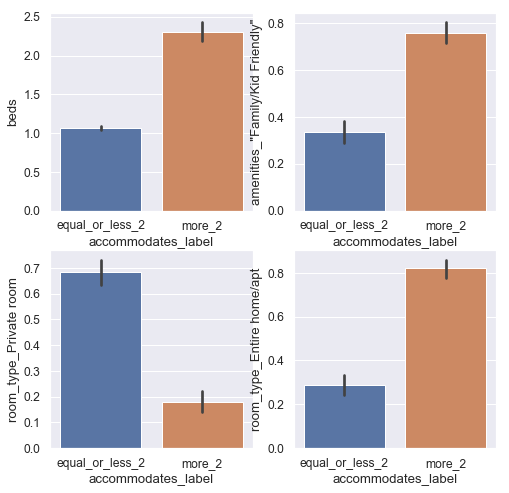

In [113]:
sns.set(font_scale=1.1)
fig, axes = plt.subplots(2, 2,figsize=(8,8))
ax0 = sns.barplot(x='accommodates_label', y='beds', data=df_listing_modi3_high, ax=axes[0][0])
ax1 = sns.barplot(x='accommodates_label', y='amenities_"Family/Kid Friendly"', data=df_listing_modi3_high, ax=axes[0][1])
ax2 = sns.barplot(x='accommodates_label', y='room_type_Private room', data=df_listing_modi3_high, ax=axes[1][0])
ax3 = sns.barplot(x='accommodates_label', y='room_type_Entire home/apt', data=df_listing_modi3_high, ax=axes[1][1])


## Summary

According to results from RandomForestClassifier and PCA, There are big difference between 'high performance group' and 'poor performance group' in terms of the features listed below.

- 'host_response_rate' : 81% of the high performance group made 100% response. However, only 38% of the poor performance group made 100% response.
- 'host_response_time' : Almost 0% of the high performance group made response no matter how lont it took.
- 'host_acceptance_rate' : 48% of the high performance group showed 100% acceptance. But only 27% ofhe high performance group showed 100% acceptance.
- 'house_rules' : 87% of the high performance group had any kinds of house rules. Only 45%  of the low performance group had house rules.


- extra_people_fee : 56% of the high performance group has a fee for extra people. But only 21% of the poor performance group has a fee for extra people.
- cancellation_policy : Only 15% of the high performance group has a flexible cancellation policy. But 43% of the poor performance grouop has a flexible cancellation policy.
- 'cleaning_fee' : The average cleaning fee of the high performance group is less than that of the poor performance group by about 21\$.


- 'price' : The average price of weekday and weekend of the high performance group is less than that of the poor performance group by about 59\$, 56\$, respectively.
- 'total available days' : The total available days of the high performance group is higher than that of the high performance group by 81 days.

- host_is_superhost : superhost or not
- 'host_verification' : 'reviews'
- 'host_identity': 86% members of the high performance group verified thier host identities. However, only 56% of the poor performance group verified thier host identities

- 'amenities' : The poor performance group has more "Elevator in Building" or "Gym than the high performance group
- 'calendar_updated' : 54% of the poor performance group updated their calendar more than a week ago. In constrast, 30% of the high perpermance group updated their calendar more than a week ago.